## 1. Import libraries (install if needed)

In [1]:
try:
    import pandas as pd
    from pandas_datareader import wb  # wb stands for WorldBank
    import geopandas as gpd
    import mapclassify
    import numpy as np
    from scipy.stats import pearsonr
    from matplotlib import pyplot as plt
    import seaborn as sns
    
    print ("The libraries are already installed and imported")
    
except:
    !pip install pandas
    !pip install pandas_datareader
    !pip install geopandas
    !pip install mapclassify
    !pip install numpy
    !pip install scipy
    !pip install matplotlib
    !pip install seaborn
    
    import pandas as pd
    from pandas_datareader import wb 
    import geopandas as gpd
    import mapclassify
    import numpy as np
    from scipy.stats import pearsonr
    from matplotlib import pyplot as plt
    import seaborn as sns
    
    print ("Libraries were not found. Installed them and imported")

    
import requests

The libraries are already installed and imported


## 2. Perform ETL


   **a. Extract**: Obtain data of source(s) 
   
   **b. Transform**: Perform transformations (e.g., cleaning data, dropping NA values) and calculations on data
   
   **c. Load**: Load the data into the target storage



### 2.1 Extract

Using the `pandas_reader` library, we can extract the relevant economic indicators from https://data.worldbank.org. 

To learn more about using `pandas_datareader` with `wb` (worldbank) package, visit https://pandas-datareader.readthedocs.io/en/latest/readers/world-bank.html

In [2]:
# Set economic indicators using their id's to extract data from.
# These indicators will also be used as our column names

economic_indicators = {
    "GDP": "NY.GDP.MKTP.CD",
    "GDP_Growth": "NY.GDP.MKTP.KD.ZG",
    "GNI_per_Capita": "NY.GNP.PCAP.CD",
    "Inflation_Rate": "FP.CPI.TOTL.ZG",
    "Unemployment_Rate": "SL.UEM.TOTL.ZS",
    "Primary_Sector_%_of_GDP": "NV.AGR.TOTL.ZS",
    "Secondary_Sector_%_of_GDP": "NV.IND.TOTL.ZS",
    "Tertiary_Sector_%_of_GDP": "NV.SRV.TOTL.ZS"
}

In [3]:
# Selecting all countries' economic indicators data from 2000 to 2021
economic_indicators_df = wb.download(country = "all", indicator = economic_indicators.values(), start = 2000, end = 2021)
economic_indicators_df

NY.GDP.MKTP.CD  NY.GDP.MKTP.KD.ZG  \
country                     year                                      
Africa Eastern and Southern 2021    1.080712e+12           4.293395   
                            2020    9.274845e+11          -2.900490   
                            2019    1.001017e+12           2.078473   
                            2018    1.007240e+12           2.510797   
                            2017    1.021119e+12           2.546020   
...                                          ...                ...   
Zimbabwe                    2004    5.805598e+09          -5.807538   
                            2003    5.727592e+09         -16.995075   
                            2002    6.342116e+09          -8.894024   
                            2001    6.777385e+09           1.439615   
                            2000    6.689958e+09          -3.059190   

                                  NY.GNP.PCAP.CD  FP.CPI.TOTL.ZG  \
country                     year                                   
Africa Eastern and Southern 2021     1453.744944        6.079328   
                            2020     1386.163976        6.362961   
                            2019     1493.732269        4.120246   
                            2018     1452.233541        4.720811   
                            2017     1440.565428        6.399343   
...                                          ...             ...   
Zimbabwe                    2004      320.000000             NaN   
                            2003      340.000000             NaN   
                            2002      370.000000             NaN   
                            2001      390.000000             NaN   
                            2000      360.000000             NaN   

                                  SL.UEM.TOTL.ZS  NV.AGR.TOTL.ZS  \
country                     year                                   
Africa Eastern and Southern 2021        8.052103       13.346870   
                            2020        7.517253       14.622160   
                            2019        6.873493       12.680728   
                            2018        6.695958       11.945356   
                            2017        6.687952       13.435255   
...                                          ...             ...   
Zimbabwe                    2004        4.390000       18.063797   
                            2003        4.750000       14.793355   
                            2002        5.062000       12.568368   
                            2001        5.355000       15.627071   
                            2000        5.688000       15.667063   

                                  NV.IND.TOTL.ZS  NV.SRV.TOTL.ZS  
country                     year                                  
Africa Eastern and Southern 2021       25.843332       50.663895  
                            2020       25.612914       51.895062  
                            2019       26.423012       52.509982  
                            2018       26.846362       53.372954  
                            2017       24.555824       53.692466  
...                                          ...             ...  
Zimbabwe                    2004       24.382749       49.833161  
                            2003             NaN       74.358681  
                            2002             NaN       77.020069  
                            2001             NaN       74.666122  
                            2000             NaN       70.125341  

[5852 rows x 8 columns]

### 2.2 Transform

Looking at the preview of the table and its dimension, we can see that

1. There're 5852 observations, where each country/region has data from the year 2000 to 2021 (so 22 years total). Therefore, there're roughly 5852/22 = 266 countries and regions.
2. There're 8 columns for the 8 economic indicators. The means the country and year columns are our 2 indexes (we can see the indexes are a level below the columns)
3. The columns' names are not readable and understandable (they're the id above that we used to extract data)
    
Therefore, we can do some data transformations here

In [4]:
# Remove the country and year index
economic_indicators_df.reset_index(inplace = True)


# Reformat the columns name
formatted_economic_indicators = list(economic_indicators.keys())
for index, column in enumerate(formatted_economic_indicators):
    column = column.replace("_", " ")       # Replace the "_" character with a " "
    if "%" in column:
        bracket_index = column.index("%")
        column = column[:bracket_index] + "(" + column[bracket_index:] + ")"   # Put the phrase "% of GDP" in bracket
    formatted_economic_indicators[index] = column

    
# Rename the columns from their ids to the indicators
economic_indicators_df.columns = ["Country/Region", "Year"] + formatted_economic_indicators
    
economic_indicators_df

,Country/Region,Year,GDP,GDP Growth,GNI per Capita,Inflation Rate,Unemployment Rate,Primary Sector (% of GDP),Secondary Sector (% of GDP),Tertiary Sector (% of GDP)
0,Africa Eastern and Southern,2021,1.080712e+12,4.293395,1453.744944,6.079328,8.052103,13.346870,25.843332,50.663895
1,Africa Eastern and Southern,2020,9.274845e+11,-2.900490,1386.163976,6.362961,7.517253,14.622160,25.612914,51.895062
2,Africa Eastern and Southern,2019,1.001017e+12,2.078473,1493.732269,4.120246,6.873493,12.680728,26.423012,52.509982
3,Africa Eastern and Southern,2018,1.007240e+12,2.510797,1452.233541,4.720811,6.695958,11.945356,26.846362,53.372954
4,Africa Eastern and Southern,2017,1.021119e+12,2.546020,1440.565428,6.399343,6.687952,13.435255,24.555824,53.692466
...,...,...,...,...,...,...,...,...,...,...
5847,Zimbabwe,2004,5.805598e+09,-5.807538,320.000000,NaN,4.390000,18.063797,24.382749,49.833161
5848,Zimbabwe,2003,5.727592e+09,-16.995075,340.000000,NaN,4.750000,14.793355,NaN,74.358681
5849,Zimbabwe,2002,6.342116e+09,-8.894024,370.000000,NaN,5.062000,12.568368,NaN,77.020069
5850,Zimbabwe,2001,6.777385e+09,1.439615,390.000000,NaN,5.355000,15.627071,NaN,74.666122


Now that we have our table is more readable, we can then perform some data cleaning

#### Duplication Checks and Cleaning

In [5]:
number_of_duplicates = economic_indicators_df.duplicated().sum()
print (f" Number of duplicates before : {number_of_duplicates}")

# Delete duplicate rows
economic_indicators_df = economic_indicators_df.drop_duplicates()

number_of_duplicates = economic_indicators_df.duplicated().sum()
print (f" Number of duplicates after removing : {number_of_duplicates}")

 Number of duplicates before : 0
 Number of duplicates after removing : 0


#### Inspecting data and checking noisy entries

In [6]:
economic_indicators_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5852 entries, 0 to 5851
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country/Region               5852 non-null   object 
 1   Year                         5852 non-null   object 
 2   GDP                          5609 non-null   float64
 3   GDP Growth                   5529 non-null   float64
 4   GNI per Capita               5285 non-null   float64
 5   Inflation Rate               4992 non-null   float64
 6   Unemployment Rate            5170 non-null   float64
 7   Primary Sector (% of GDP)    5302 non-null   float64
 8   Secondary Sector (% of GDP)  5260 non-null   float64
 9   Tertiary Sector (% of GDP)   5208 non-null   float64
dtypes: float64(8), object(2)
memory usage: 502.9+ KB


We can see that the data has 5852 observations in total but for the columns of each economic indicator, the number of non-null entries doesn't add up to 5852. Therefore, there're null entries, which we will delete. 

In [7]:
economic_indicators_df = economic_indicators_df.dropna()    # Delete rows with NA values

economic_indicators_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4503 entries, 0 to 5841
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country/Region               4503 non-null   object 
 1   Year                         4503 non-null   object 
 2   GDP                          4503 non-null   float64
 3   GDP Growth                   4503 non-null   float64
 4   GNI per Capita               4503 non-null   float64
 5   Inflation Rate               4503 non-null   float64
 6   Unemployment Rate            4503 non-null   float64
 7   Primary Sector (% of GDP)    4503 non-null   float64
 8   Secondary Sector (% of GDP)  4503 non-null   float64
 9   Tertiary Sector (% of GDP)   4503 non-null   float64
dtypes: float64(8), object(2)
memory usage: 387.0+ KB


For the purpose of readability, we can perform additional transformations 

1. Adjust the values of the GDP column so that it's in billions
2. Round the numerical values to 2 d.p.

In [8]:
# Function to round numerical values to 2 d.p.
def round_to_2_dp(value):
    value = round(value, 2)
    return value
    
    
# Function to adjust values to billions
def in_billions(value):
    value = value/(10**9)
    return value
    
    
economic_indicators_df = economic_indicators_df.rename(columns = {"GDP": "GDP (in billions)"})    # Rename column
economic_indicators_df["GDP (in billions)"] = economic_indicators_df["GDP (in billions)"].apply(in_billions)  # Apply function to adjust values to billions


# Apply function to round values to 2 d.p. to every numerical columns
for column in economic_indicators_df.columns[2:]:
    economic_indicators_df[column] = economic_indicators_df[column].apply(round_to_2_dp)
    
    
economic_indicators_df

,Country/Region,Year,GDP (in billions),GDP Growth,GNI per Capita,Inflation Rate,Unemployment Rate,Primary Sector (% of GDP),Secondary Sector (% of GDP),Tertiary Sector (% of GDP)
0,Africa Eastern and Southern,2021,1080.71,4.29,1453.74,6.08,8.05,13.35,25.84,50.66
1,Africa Eastern and Southern,2020,927.48,-2.90,1386.16,6.36,7.52,14.62,25.61,51.90
2,Africa Eastern and Southern,2019,1001.02,2.08,1493.73,4.12,6.87,12.68,26.42,52.51
3,Africa Eastern and Southern,2018,1007.24,2.51,1452.23,4.72,6.70,11.95,26.85,53.37
4,Africa Eastern and Southern,2017,1021.12,2.55,1440.57,6.40,6.69,13.44,24.56,53.69
...,...,...,...,...,...,...,...,...,...,...
5837,Zimbabwe,2014,19.50,1.48,1210.00,-0.20,4.77,8.75,23.72,57.59
5838,Zimbabwe,2013,19.09,3.20,1200.00,1.63,4.98,7.14,23.80,58.33
5839,Zimbabwe,2012,17.11,15.74,1120.00,3.73,5.15,8.04,25.33,55.09
5840,Zimbabwe,2011,14.10,14.62,950.00,3.47,5.37,8.67,21.72,57.90


### 2.3 Load

After transforming our data set, we can save the processed data to a CSV file and upload to https://data.world/

Here's the link to the dataset (*you have to create an account in order to access it*): https://data.world/nguyenminhvinhky/selected-economic-indicators

In [9]:
economic_indicators_df.to_csv("Selected_Economic_Indicators.csv")

## 3. Analysis: Summary and Visualization

To begin with, let's open our .csv file (notice that we can also use the data frame directly here)

In [10]:
# Before starting, let's tell Jupyter Notebook not to ignore any output that is supposed to be printed
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

economic_indicators_df = pd.read_csv("Selected_Economic_Indicators.csv")

economic_indicators_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4503 entries, 0 to 4502
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   4503 non-null   int64  
 1   Country/Region               4503 non-null   object 
 2   Year                         4503 non-null   int64  
 3   GDP (in billions)            4503 non-null   float64
 4   GDP Growth                   4503 non-null   float64
 5   GNI per Capita               4503 non-null   float64
 6   Inflation Rate               4503 non-null   float64
 7   Unemployment Rate            4503 non-null   float64
 8   Primary Sector (% of GDP)    4503 non-null   float64
 9   Secondary Sector (% of GDP)  4503 non-null   float64
 10  Tertiary Sector (% of GDP)   4503 non-null   float64
dtypes: float64(8), int64(2), object(1)
memory usage: 387.1+ KB


Print the first 10 rows to see what the table looks like.

In [11]:
economic_indicators_df.head(10)

,Unnamed: 0,Country/Region,Year,GDP (in billions),GDP Growth,GNI per Capita,Inflation Rate,Unemployment Rate,Primary Sector (% of GDP),Secondary Sector (% of GDP),Tertiary Sector (% of GDP)
0,0,Africa Eastern and Southern,2021,1080.71,4.29,1453.74,6.08,8.05,13.35,25.84,50.66
1,1,Africa Eastern and Southern,2020,927.48,-2.90,1386.16,6.36,7.52,14.62,25.61,51.90
2,2,Africa Eastern and Southern,2019,1001.02,2.08,1493.73,4.12,6.87,12.68,26.42,52.51
3,3,Africa Eastern and Southern,2018,1007.24,2.51,1452.23,4.72,6.70,11.95,26.85,53.37
4,4,Africa Eastern and Southern,2017,1021.12,2.55,1440.57,6.40,6.69,13.44,24.56,53.69
5,5,Africa Eastern and Southern,2016,882.72,2.22,1456.03,6.57,6.61,13.71,24.48,53.39
6,6,Africa Eastern and Southern,2015,924.52,2.98,1574.78,5.25,6.51,13.56,24.82,53.92
7,7,Africa Eastern and Southern,2014,1003.77,3.99,1691.54,5.37,6.41,12.52,26.99,53.50
8,8,Africa Eastern and Southern,2013,983.47,4.22,1711.73,5.75,6.45,11.59,27.69,53.87
9,9,Africa Eastern and Southern,2012,972.57,0.84,1679.26,9.16,6.56,11.43,28.13,53.71


Notice that for the country/region column, it doesn't only contain individual countries. It also have different geographic regions and economic groupings, which we'll store in 2 different arrays for later use.

In [12]:
# geographic regions
region = ["Africa Eastern and Southern", "Africa Western and Central", "Arab World", "Caribbean small states", 
          "Central Europe and the Baltics", "East Asia & Pacific", "Euro area", "Europe & Central Asia", 
          "European Union", "Latin America & Caribbean", "Middle East & North Africa", "North America", 
          "Other small states", "Pacific island small states", "Small states", "South Asia", "Sub-Saharan Africa", 
          "Upper middle income", "World"]


# economic groupings
economic_group = ["Early-demographic dividend", "Heavily indebted poor countries", "High income", "IBRD only", 
                  "IDA & IBRD total", "IDA blend", "IDA only", "IDA total", "Late-demographic dividend", 
                  "Least developed countries: UN classification", "Low & middle income", "Low income", 
                  "Lower middle income", "Middle income", "OECD members", "Post-demographic dividend", 
                  "Pre-demographic dividend", ]


# individual countries
countries = []
all_area = set(economic_indicators_df["Country/Region"]) 


for area in all_area:
    if (area not in region) and (area not in economic_group):
        countries.append(area)

        
# Check if we collect all countries
print("The number of countries in the data set is", len(countries))   # should be around 195 countries

The number of countries in the data set is 186


We can see that our data set have a few countries with missing data, but overall it's close to 195 countries. Now, let's jump into some data analysis. 

### 3.1 GDP vs GNI per Capita (2000 and 2021)

We'll start off by describing and plotting `GDP` and `GNI per Capita` data for two years: 2000 and 2021

In [13]:
# Filter rows that contain individual countries and the year 2000
gdp_2000 = economic_indicators_df.loc[(economic_indicators_df["Country/Region"].isin(countries))
                                            & (economic_indicators_df["Year"] == 2000)]

# Select the GDP column
gdp_2000 = gdp_2000["GDP (in billions)"]

gdp_2000.describe()

count      149.000000
mean       297.763020
std       1001.712041
min          0.200000
25%          5.080000
50%         19.090000
75%        165.020000
max      10250.950000
Name: GDP (in billions), dtype: float64

In [14]:
# Filter rows that contain individual countries and the year 2021
gdp_2021 = economic_indicators_df.loc[(economic_indicators_df["Country/Region"].isin(countries))
                                            & (economic_indicators_df["Year"] == 2021)]

# Select the GDP column
gdp_2021 = gdp_2021["GDP (in billions)"]

gdp_2021.describe()

count      151.000000
mean      1035.641258
std       3407.721525
min          0.470000
25%         17.935000
50%         69.240000
75%        429.925000
max      23315.080000
Name: GDP (in billions), dtype: float64

In [15]:
# Filter rows that contain individual countries and the year 2000
gni_per_capita_2000 = economic_indicators_df.loc[(economic_indicators_df["Country/Region"].isin(countries))
                                            & (economic_indicators_df["Year"] == 2000)]

# Select the GNI per Capita column
gni_per_capita_2000 = gni_per_capita_2000["GNI per Capita"]

gni_per_capita_2000.describe()

count      149.000000
mean      6665.878255
std      10422.185978
min        120.000000
25%        573.300000
50%       1746.190000
75%       5250.000000
max      45690.000000
Name: GNI per Capita, dtype: float64

In [16]:
# Filter rows that contain individual countries and the year 2021
gni_per_capita_2021 = economic_indicators_df.loc[(economic_indicators_df["Country/Region"].isin(countries))
                                            & (economic_indicators_df["Year"] == 2021)]

# Select the GNI per Capita column
gni_per_capita_2021 = gni_per_capita_2021["GNI per Capita"]

gni_per_capita_2021.describe()

count      151.000000
mean     14963.166358
std      20559.118825
min        220.000000
25%       2350.000000
50%       6070.000000
75%      17240.000000
max      90600.000000
Name: GNI per Capita, dtype: float64

Now, to combine with our information, let's plot histograms for GDP and GNI per Capita for the years 2000 and 2021 to best visualize the distribution of these economic indicators across countries.

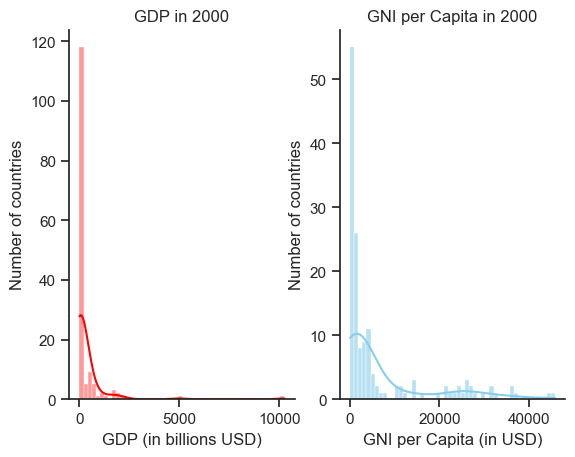

In [17]:
# Set theme
sns.set_theme(style = "ticks", palette = "pastel", 
              rc = {"axes.spines.right": False, 
                    "axes.spines.top": False})


# Allow side-by-side plotting
fig, ax = plt.subplots(1, 2)


# Plot histogram for GDP
gdp_2000_hist = sns.histplot(gdp_2000,
                     kde = True,
                     bins = 50,
                     alpha = 0.4,
                     color = "red",
                     edgecolor = "white",
                     ax = ax[0])


# Set axis labels and title
gdp_2000_hist.set(xlabel = "GDP (in billions USD)", 
                  ylabel = "Number of countries",
                  title = "GDP in 2000")


# Plot histogram for GNI per Capita
gni_per_capita_2000_hist = sns.histplot(gni_per_capita_2000, 
                             kde = True,
                             bins = 50,
                             alpha = 0.6,
                             color = "skyblue",
                             edgecolor = "white",
                             ax = ax[1])


# Set axis labels and title
gni_per_capita_2000_hist.set(xlabel = "GNI per Capita (in USD)", 
                             ylabel = "Number of countries",
                             title = "GNI per Capita in 2000")

plt.show();

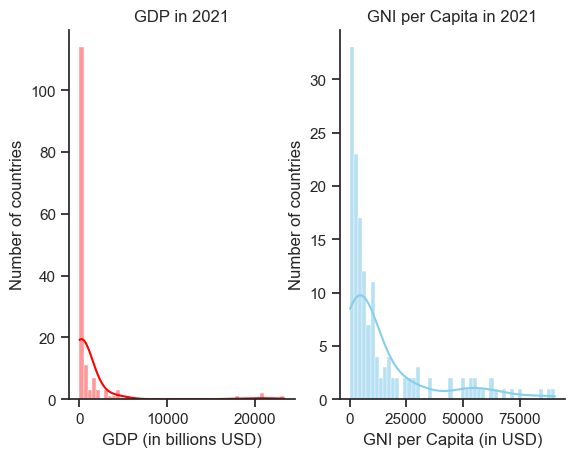

In [18]:
# Set theme
sns.set_theme(style = "ticks", palette = "pastel", 
              rc = {"axes.spines.right": False, 
                    "axes.spines.top": False})

# Allow side-by-side plotting
fig, ax = plt.subplots(1, 2)


# Plot historgram for GDP
gdp_2021_hist = sns.histplot(gdp_2021,
                 kde = True,
                 bins = 50,
                 alpha = 0.4,
                 color = "red",
                 edgecolor = "white",
                 ax = ax[0])


# Set axis labels and title
gdp_2021_hist.set(xlabel = "GDP (in billions USD)", 
                  ylabel = "Number of countries",
                  title = "GDP in 2021")


# Plot histogram for GNI per Capita
gni_per_capita_2021_hist = sns.histplot(gni_per_capita_2021, 
                             kde = True,
                             bins = 50,
                             alpha = 0.6,
                             color = "skyblue",
                             edgecolor = "white",
                             ax = ax[1])


# Set axis labels and title
gni_per_capita_2021_hist.set(xlabel = "GNI per Capita (in USD)", 
                             ylabel = "Number of countries",
                             title = "GNI per Capita in 2021")


plt.show();

**Insight**:

    - Looking at the graph and statistical values, we can see that both GDP and GNI per Capita are positively skewed (i.e., mean >> median), suggesting the mean values is skewed by extremely large GDP and GNI per Capita values. Looking at the graph, we can see there's a large number of countries of low GDP and GNI per capita concentrated in the left side of the graph.
    - From 2000 to 2021, GDP and GNI per capita are more evenly spread (e.g., the standard deviation increase and the graph's peak is less "pointy"), so we can expected the wealth gap to reduce in the future, but at a rather slow rate.

*Surprising findings*: I'm didn't expect GDP and GNI per Capita are similarly distributed because I thought the effect of large GDPs would be offset by countries with large population (e.g., China, India) so that GNI per Capita would be more evenly distributed. 

However, I later realize there're also countries with small/moderate GDP but also a small population that results in high GNI per Capita (e.g., Singapore, Luxemberg)

### 3.2 Economic sectors (from 2000 to 2021)

Economic sectors: Areas of the economy that grouped similar business activities together. The 3 main economic sectors are

1. Primary Sector: Production or extraction natural resources 
    - *Examples*: Agriculture, mining, forestry, fishery, oil and gas industry
2. Secondary Sector: Processing raw materials into finished products 
    - *Examples*: Manufacturing, construction, textile, engineering industries (e.g., chemical, aerospace, shipbuilding)
3. Tertiary Sector: Providing services 
    - *Examples*: Retail, transportation, tourism, entertainment, insurance, healthcare, finance

*Note*: There's also "quaternary sector", which focuses on knowledge-based/intellectual activities such as Information Technology, Research and Development, Education, etc. 

For now, we'll only be working the 3 main economic sectors. 

Firstly, let filter the rows that contain data of the world and select the columns corresponding to the 3 economic sectors

In [19]:
# Filter row containing data of all geographic regions
region_economic_indicators =  economic_indicators_df.loc[economic_indicators_df["Country/Region"].isin(region)]

# Sort rows by year (ascending)
region_economic_indicators = region_economic_indicators.sort_values(by = ["Year"])


# Select economic sectors for world
world_economic_sector = region_economic_indicators.loc[region_economic_indicators["Country/Region"] == "World"]
world_economic_sector = world_economic_sector[["Year", 
                                               "Primary Sector (% of GDP)", 
                                               "Secondary Sector (% of GDP)", 
                                               "Tertiary Sector (% of GDP)"]]


world_economic_sector

,Year,Primary Sector (% of GDP),Secondary Sector (% of GDP),Tertiary Sector (% of GDP)
1008,2000,3.38,27.78,63.58
1007,2001,3.37,26.86,64.56
1006,2002,3.33,26.37,65.02
1005,2003,3.32,26.38,64.81
1004,2004,3.36,26.77,64.14
1003,2005,3.24,27.26,63.63
1002,2006,3.22,27.77,62.93
1001,2007,3.39,27.83,62.55
1000,2008,3.56,28.16,62.20
999,2009,3.69,26.64,64.14


Now, let's visualize these data by plotting a stacked bar chart to see what percentage of these 3 economic sectors contribute to the world's total GDP.

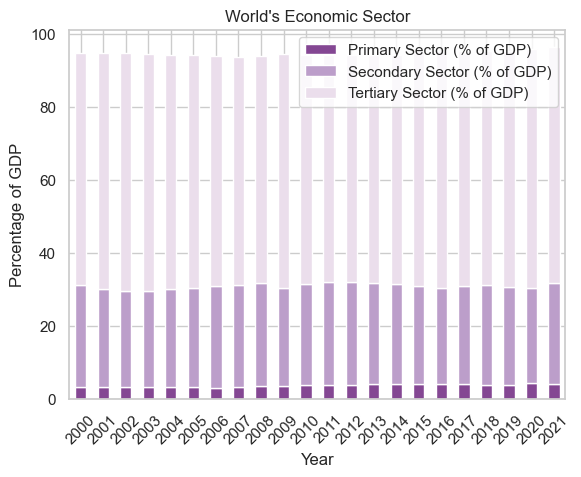

In [20]:
# Set theme of the plot
sns.set_theme(style = "whitegrid", palette = "PRGn")


# Plot stacked bar chart
world_economic_sector.set_index("Year").plot(kind = "bar",
                                             stacked = True)


# Label the axes and title
plt.title("World's Economic Sector")
plt.xlabel("Year")
plt.ylabel("Percentage of GDP")
plt.xticks(rotation = 45)


plt.show();

**Insight**

    - We can see that the primary sector contribute around 4% to the world's GDP, 27% for the secondary sector, and 64% for the tertiary sector. We can simplify this ratio to ~ 1:7:17
    - The trend stay constant from 2000 to 2021, so we can expected the composition to be the same in the future
    - Therefore, we can reasonably deduce that the world's economy heavily relies on service provisions, then production and manufacturing, and finally natural resources
    
    
However, does this pattern applies for different regions? Does Asia have the same economic sectors ratio as Europe?

In [21]:
# Filter rows that contain geographic regions 
region_economic_indicators = region_economic_indicators.loc[economic_indicators_df["Country/Region"] != "World"]


# Select rows with relevant data
region_economic_indicators = region_economic_indicators[["Year", "Country/Region",
                                               "Primary Sector (% of GDP)", 
                                               "Secondary Sector (% of GDP)", 
                                               "Tertiary Sector (% of GDP)"]]


region_economic_indicators

,Year,Country/Region,Primary Sector (% of GDP),Secondary Sector (% of GDP),Tertiary Sector (% of GDP)
306,2000,European Union,2.20,25.36,62.05
986,2000,Upper middle income,8.33,34.98,50.84
920,2000,Sub-Saharan Africa,15.48,28.71,49.29
876,2000,South Asia,22.44,25.54,44.58
799,2000,Pacific island small states,18.23,16.44,53.10
...,...,...,...,...,...
483,2021,Latin America & Caribbean,6.88,29.89,65.08
855,2021,South Asia,16.70,25.94,48.53
285,2021,European Union,1.62,22.79,65.00
724,2021,North America,1.02,18.31,76.74


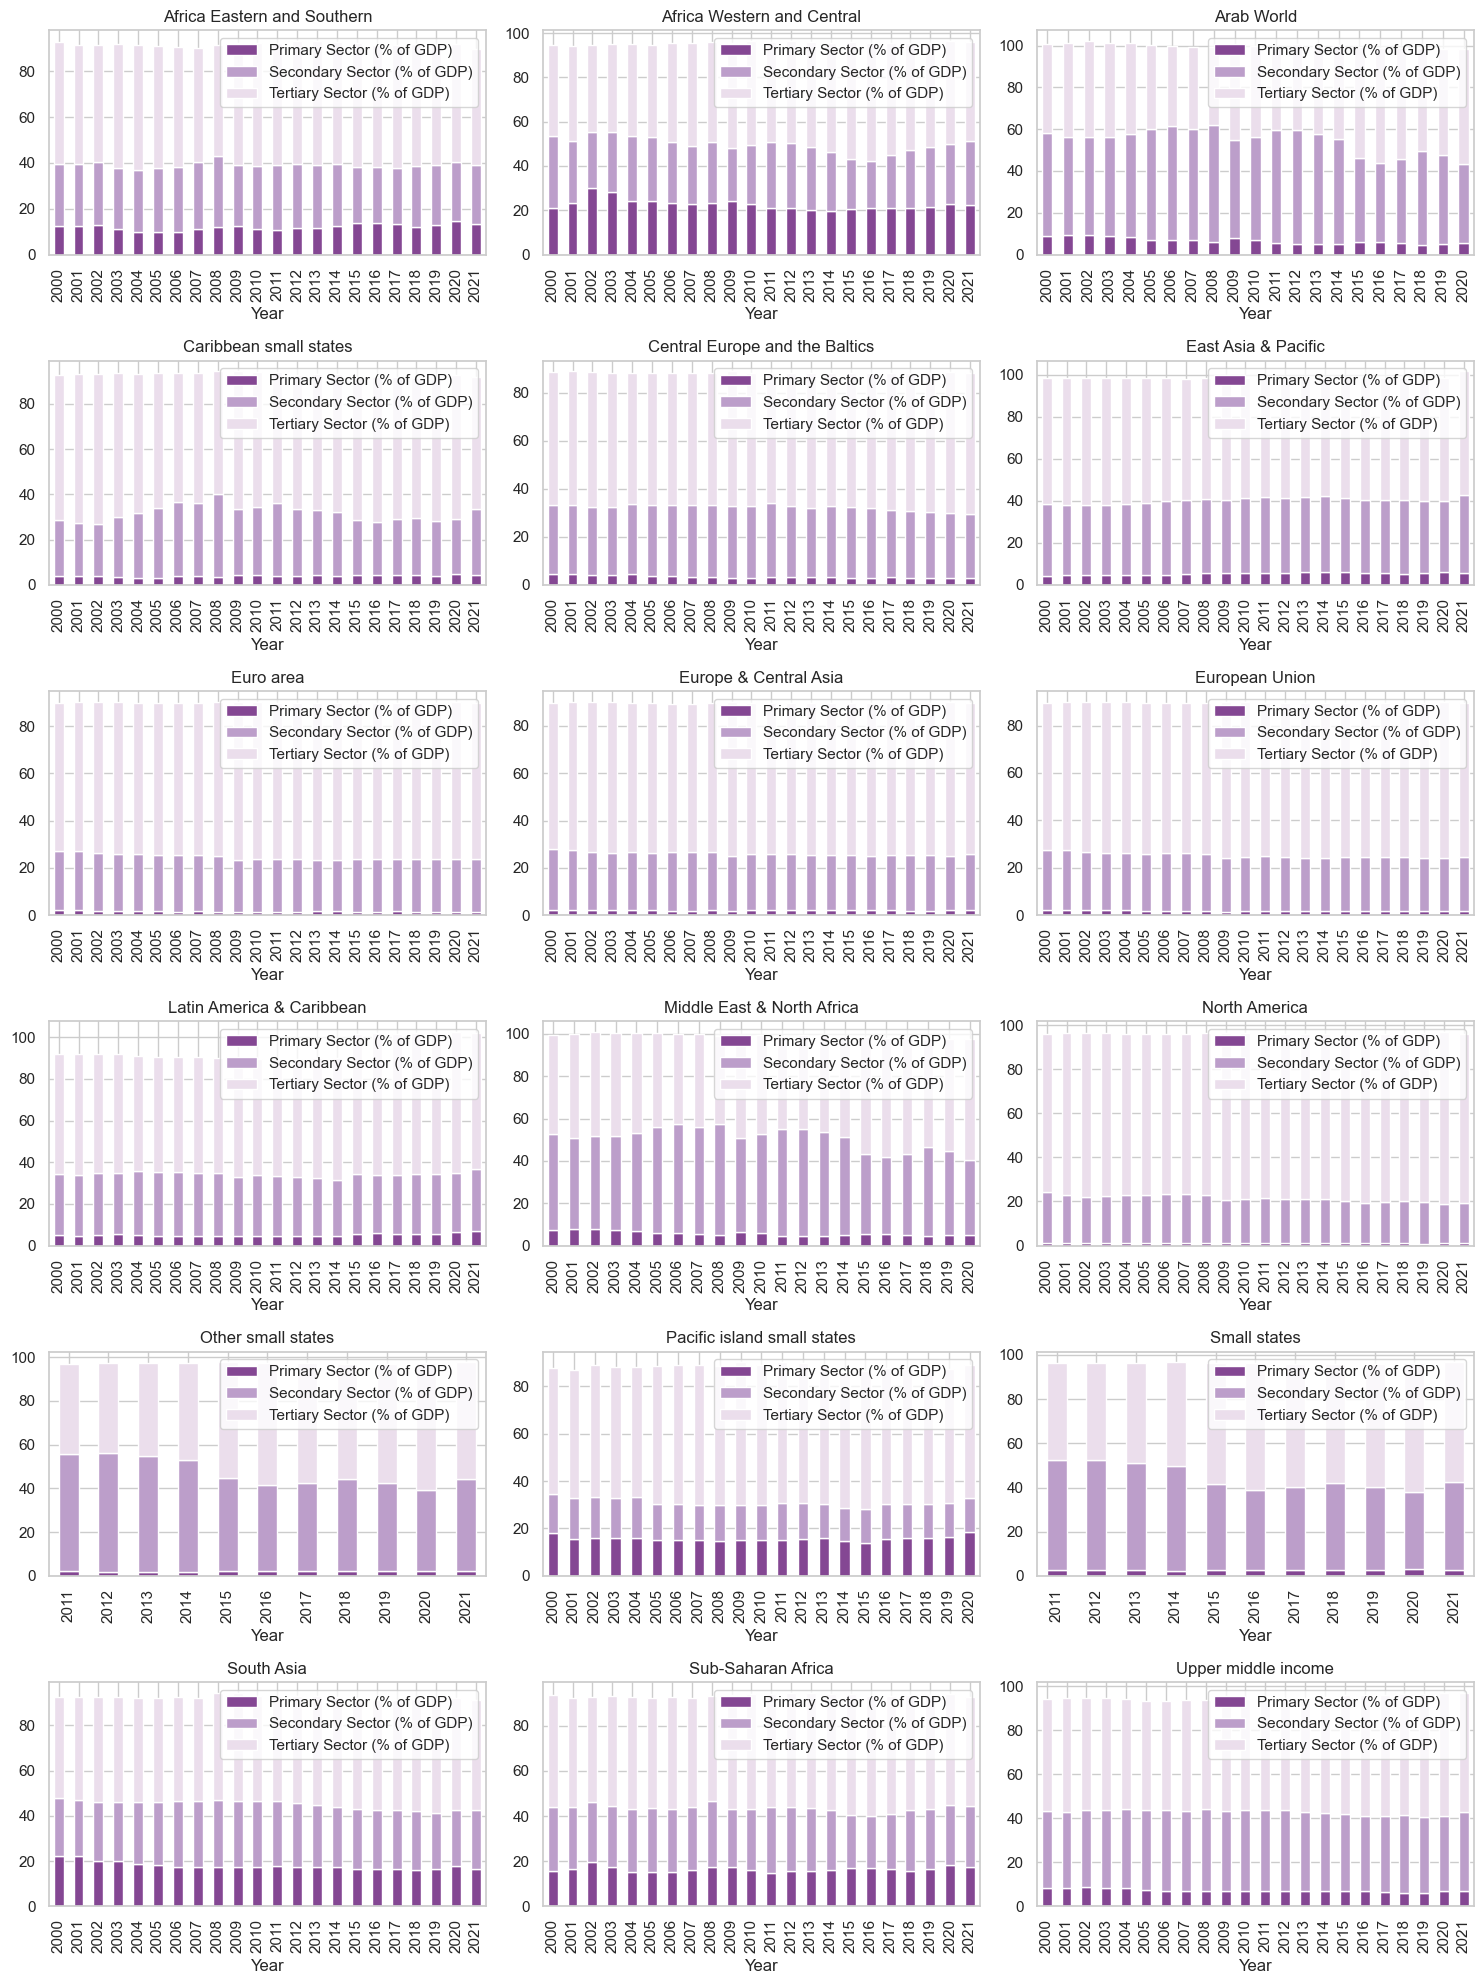

In [22]:
# Create a 6*3 suplots (i.e., 6 rows and 3 columns)
fig, axs = plt.subplots(6, 3, figsize = (15, 20))


# Loop through seach suplot
index = 0
for row in range (6):
    for col in range (3):
        area = region[index]
        if area == "World":    # We already plot the world's above, so skip
            continue
        graph_df = region_economic_indicators.loc[region_economic_indicators["Country/Region"] == area]
        graph_df.set_index("Year").plot(kind = "bar",       # Plot a stacked bar chart
                                        stacked = True,
                                        ax = axs[row, col])
        
        # Label axes and title
        axs[row, col].set_title(area)
        axs[row, col].get_xaxis().set_visible(True)
        axs[row, col].get_yaxis().set_visible(True)
        
        index += 1

        
fig.tight_layout()
plt.show();

**Insight**

We can see that the same trend doesn't apply to different geographic regions (and the same can likely be inferred for country-to-country). 

    - For instance, Pacific island small states' secondary sector is outweighed by its primary sector. 
    - Middle East's & North Africa's secondary sector, however, contributed to its GDP as much as its tertiary sector. 
    - Contrarily, North America's tertiary sector contribute up to 80% of its economy, with the remaining 20% from secondary sector and an almost non-existent primary sector.

Therefore, the 1:7:17 ratio doesn't apply to different geographic regions. However, the general pattern - tertiary sector contribute most to the GDP, then secondary sector, and finally the primary sector - can be observed in most regions. Most importantly, the sectors' composition doesn't change much from 2000 to 2021 for all regions, so we can expected a similar pattern in the upcoming years.



### 3.3 GDP Growth Rate, Inflation Rate, and Unemployment Rate

GDP Growth Rate, Inflation Rate, and Unemployment Rate are 3 of the most used to indicators to measure the "health" of an economy. In theory, their relationship is proposed as below

1. The growth of GDP (i.e., positive GDP Growth Rate) causes inflation
2. Inflation and Unemployment has an inverse relationship (i.e., a high inflation rate correlates with a low unemployment rate and vice versa)
3. Okun’s law states a country’s GDP must grow ~ 4%/year to achieve a 1% reduction in the unemployment rate (this is a very simplified summary)

Let's test out whether our data confirmed this

In [23]:
# Filter row containing data of all geographic regions
econ_group_economic_indicators =  economic_indicators_df.loc[economic_indicators_df["Country/Region"].isin(economic_group + ["World"])]


# Sort rows by year (ascending)
econ_group_economic_indicators = econ_group_economic_indicators.sort_values(by = ["Year"])


# Select economic sectors for world
econ_group_economic_indicators = econ_group_economic_indicators[["Country/Region", "Year", 
                                                                 "GDP Growth", 
                                                                 "Inflation Rate", 
                                                                 "Unemployment Rate"]]


econ_group_economic_indicators

,Country/Region,Year,GDP Growth,Inflation Rate,Unemployment Rate
1008,World,2000,4.51,3.43,5.76
723,Middle income,2000,5.88,4.37,5.57
394,IDA & IBRD total,2000,5.73,4.20,5.71
614,Low income,2000,3.34,3.82,5.12
460,IDA total,2000,3.82,3.77,4.31
...,...,...,...,...,...
329,High income,2021,5.24,2.51,5.67
615,Lower middle income,2021,5.59,4.71,5.87
351,IBRD only,2021,7.16,4.40,6.44
373,IDA & IBRD total,2021,6.93,4.27,6.31


Before we proceed to data visualization, we can unpivot our data frame from wide to long format so that the three rates - GDP Growth, Inflation Rate, and Unemployment Rate - is in one column and their corresponding values in another column.

In [24]:
# Select world's data
world_rate = econ_group_economic_indicators.loc[econ_group_economic_indicators["Country/Region"] == "World"]


# Use pd.melt() to unpivot the data
pivot_world_rate = pd.melt(world_rate, 
                           id_vars = "Year",   # Identifer variable, which will not be unpivot
                           value_vars = ["GDP Growth", "Inflation Rate", "Unemployment Rate"],    # Columns to be unpivot
                           var_name = "Rate",  # Name for the new column for the unpivoted columns above
                           value_name = "Rate %")    # Name for the new column for the values of the unpivoted columns


pivot_world_rate

,Year,Rate,Rate %
0,2000,GDP Growth,4.51
1,2001,GDP Growth,2.01
2,2002,GDP Growth,2.30
3,2003,GDP Growth,3.11
4,2004,GDP Growth,4.47
...,...,...,...
61,2017,Unemployment Rate,5.56
62,2018,Unemployment Rate,5.40
63,2019,Unemployment Rate,5.36
64,2020,Unemployment Rate,6.58


#### 3.3.1 Graphical Visualization

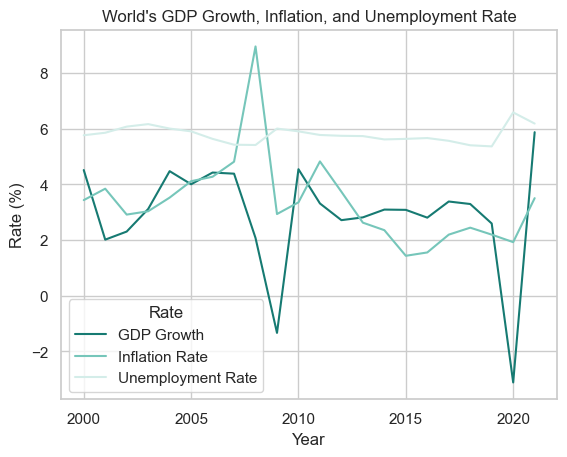

In [25]:
# Set the theme of the plot
sns.set_theme(style = "whitegrid", palette = "BrBG_r")


# Plot line graph
sns.lineplot(data = pivot_world_rate,
             x = "Year",
             y = "Rate %",
             hue = "Rate")      # Grouping variable that will produce lines with different colors 
                                # This is why we unpivot our data frame earlier on
    

# Label the axes and title
plt.title("World's GDP Growth, Inflation, and Unemployment Rate")
plt.xlabel("Year")
plt.ylabel("Rate (%)")


plt.show();

 **Observation**
 
    - We can see that unemployment rate is around 6% and remains constant to a great extent
    - Inflation rate and GDP growth varies between 2-4% for most of the time, except around 2008-2009 and 2020, which occurs during the Great Recession and COVID-19 pandemic, respectively.
    - We can see that during the Great Recession, GDP Growth plummeted while Inflation Rate surged as we expected. During the COVID-19 pandemic, however, only the GDP Growth plunged dramatically, while the other indicators didn't display significant changes.
    
However, we cannot determine exactly the variables's relationship from a line graph. Alternatively, we can also use scatter plot for our three variables. Let's try a 3D plot first.

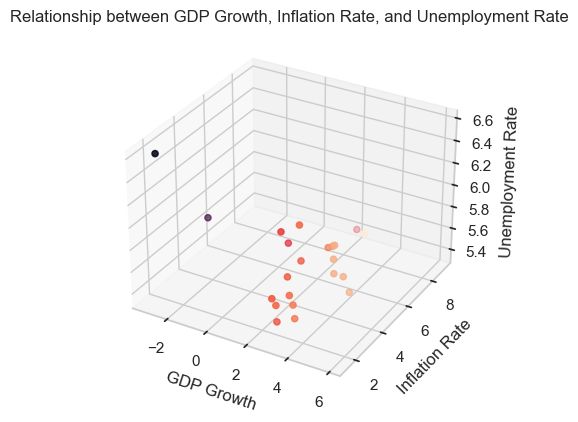

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')  # 111 means 1x1 grid, first subplot


# Select the axes for each economic indicators
x = world_rate["GDP Growth"]
y = world_rate["Inflation Rate"]
z = world_rate["Unemployment Rate"]


# Label axes and title
ax.set_xlabel("GDP Growth")
ax.set_ylabel("Inflation Rate")
ax.set_zlabel("Unemployment Rate")
ax.set_title("Relationship between GDP Growth, Inflation Rate, and Unemployment Rate")


# Scatter plot
ax.scatter(x, y, z, c = x, marker = "o")


plt.show();

The 3D plot, turns out, is even more unreadable than the line graphs. However, since scatter plots can allow us to perform bivariate analysis, we can break this down to a graph between two indicators.

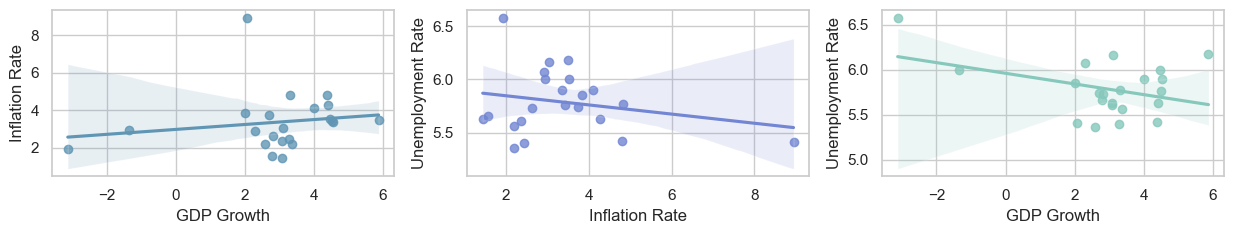

In [27]:
fig, axs = plt.subplots(1, 3, figsize = (12.5, 2.5))

sns.regplot(data = world_rate, 
            x = "GDP Growth", 
            y = "Inflation Rate",
            color = "#6096B4",
            ax = axs[0])

sns.regplot(data = world_rate, 
            x = "Inflation Rate", 
            y = "Unemployment Rate",
            color = "#7286D3",
            ax = axs[1])

sns.regplot(data = world_rate, 
            x = "GDP Growth", 
            y = "Unemployment Rate",
            color = "#86C8BC",
            ax = axs[2])

plt.tight_layout()
plt.show();

Now, we can analyze the relationship between any two variables much better. To aid our graph's interpretation, let's measure the correlation between two variables.

In [28]:
p1 = pearsonr(world_rate["GDP Growth"], world_rate["Inflation Rate"])
p2 = pearsonr(world_rate["Inflation Rate"], world_rate["Unemployment Rate"])
p3 = pearsonr(world_rate["Unemployment Rate"], world_rate["GDP Growth"])


print("GDP Growth's and Inflation Rate's correlation coefficient:", p1[0])
print("Inflation Rate's and Unemployment Rate's correlation coefficient:", p2[0])
print("Unemployment Rate's and GDP Growth's correlation coefficient:", p3[0])

GDP Growth's and Inflation Rate's correlation coefficient: 0.16245442958631323
Inflation Rate's and Unemployment Rate's correlation coefficient: -0.225377549379503
Unemployment Rate's and GDP Growth's correlation coefficient: -0.3842835146504002


**Insight**:

Using graph and correlation, we can observed that

1. GDP Growth and Inflation Rate have a positive relationship, confirming the theory.
2. Inflation Rate and Unemployment Rate do indeed an inverse relationship, confirming the theory.
3. GDP's Growth reduced Unemployment Rate, but we can see from the graph an increase in 6% GDP Growth only results in a 0.5% reduction in unemployment rate. Therefore, Okun's law is not concrete.

Moreover, since all the correlation coefficients are close to 0, we can see that in practice, the relationship of the variables is true to a very moderate/weak extent. Also, since the regression line is flat, the changes of the independent variable has very little effect on the dependent variable. 

This is understable as we are simplifying the economy down to three indicators whereas in reality, this is definitely not the case as other indicators and lags need to be factored into.

#### 3.3.2 Map Visualization (using geopandas)

Now, let's see the distribution of GDP Growth, Inflation Rate, and Unemployment Rate across the world. We'll use `geopandas` library for map visualization.

Let's start off by loading the sample data provided.

In [29]:
world_map_df = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world_map_df = world_map_df[world_map_df["name"] != "Antarctica"]   # Remove Antarctica


world_map_df

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


We can see that this data grame also contain a `geometry` column, which allow us to plot maps. 

Now, to plot the economic rates to a map, we need to join the two tables together. We can do a preliminary testing to see if there's any problem in joining the two data frames,

In [30]:
test_df = pd.merge(world_map_df, economic_indicators_df,
                   left_on = "name", right_on = "Country/Region",
                   how = "outer")


test_df.loc[test_df["Country/Region"].isnull()]   # Return row where the Country/Region column is null 
                                                  # (i.e., the country's name doesn't match)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Unnamed: 0,Country/Region,Year,GDP (in billions),GDP Growth,GNI per Capita,Inflation Rate,Unemployment Rate,Primary Sector (% of GDP),Secondary Sector (% of GDP),Tertiary Sector (% of GDP)
44,603253.0,Africa,W. Sahara,ESH,907.0,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,328239523.0,North America,United States of America,USA,21433226.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,44938712.0,South America,Argentina,ARG,445445.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157,86790567.0,Africa,Dem. Rep. Congo,COD,50400.0,"POLYGON ((29.34000 -4.49998, 29.51999 -5.41998...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158,10192317.3,Africa,Somalia,SOM,4719.0,"POLYGON ((41.58513 -1.68325, 40.99300 -0.85829...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
241,10738958.0,North America,Dominican Rep.,DOM,88941.0,"POLYGON ((-71.70830 18.04500, -71.68774 18.316...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
242,144373535.0,Europe,Russia,RUS,1699876.0,"MULTIPOLYGON (((180.00000 71.51571, 180.00000 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243,389482.0,North America,Bahamas,BHS,13578.0,"MULTIPOLYGON (((-78.98000 26.79000, -78.51000 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
244,3398.0,South America,Falkland Is.,FLK,282.0,"POLYGON ((-61.20000 -51.85000, -60.00000 -51.2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,56225.0,North America,Greenland,GRL,3051.0,"POLYGON ((-46.76379 82.62796, -43.40644 83.225...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 3.3.2.a Back to Data Transformation

After inspection, we can see several mismatches in naming conventions, which are listed in the dictionary below. In the future, we can join the two tables by their `iso_a3` code for convenience. This is just a demonstration of how we can replace the value of the columns.

In [31]:
name_change = {
    "United States of America": "United States",
    "Dem. Rep. Congo": "Congo, Dem. Rep.",
    "Dominican Rep.": "Dominican Republic",
    "Russia": "Russian Federation",
    "Bahamas": "Bahamas, The",
    "Venezuela": "Venezuela, RB",
    "Côte d'Ivoire": "Cote d'Ivoire",
    "Central African Rep.": "Central African Republic",
    "Congo": "Congo, Rep.", 
    "Eq. Guinea": "Equatorial Guinea",
    "eSwatini": "Eswatini",
    "Gambia": "Gambia, The",
    "Laos": "Lao PDR",
    "South Korea": "Korea, Rep.",
    "Kyrgyzstan": "Kyrgyz Republic",
    "Iran": "Iran, Islamic Rep.",
    "Syria": "Syrian Arab Republic",
    "Turkey": "Turkiye",
    "Solomon Is.": "Solomon Islands",
    "Brunei": "Brunei Darussalam",
    "Slovakia": "Slovak Republic",
    "Yemen": "Yemen, Rep.",
    "N. Cyprus": "Cyprus",
    "Egypt": "Egypt, Arab Rep.",
    "Bosnia and Herz.": "Bosnia and Herzegovina",
    "S. Sudan": "South Sudan"
}


# replace values using key-value pair of the dictionary
world_map_df = world_map_df.replace(name_change)

In [32]:
# must change column name so that both dataframe can join using the same column
economic_indicators_df = economic_indicators_df.rename(columns = {"Country/Region": "name"})


# Set index to allow joining
world_map_df = world_map_df.set_index("name")   
economic_indicators_df = economic_indicators_df.set_index("name")   


# join world_map_df as the left data frame so that the dataframe 
# is still geoDataFrame and the column "geometry" is kept, allowing map plotting
join_world_map = world_map_df.join(economic_indicators_df, how = "outer")   


join_world_map

,pop_est,continent,iso_a3,gdp_md_est,geometry,Unnamed: 0,Year,GDP (in billions),GDP Growth,GNI per Capita,Inflation Rate,Unemployment Rate,Primary Sector (% of GDP),Secondary Sector (% of GDP),Tertiary Sector (% of GDP)
name,,,,,,,,,,,,,,,
Afghanistan,38041754.0,Asia,AFG,19291.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",1080.0,2019.0,18.90,3.91,530.0,2.30,11.22,25.77,14.06,55.47
Afghanistan,38041754.0,Asia,AFG,19291.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",1081.0,2018.0,18.42,1.19,520.0,0.63,11.15,22.04,13.39,59.48
Afghanistan,38041754.0,Asia,AFG,19291.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",1082.0,2017.0,18.90,2.65,540.0,4.98,11.18,26.42,10.05,58.33
Afghanistan,38041754.0,Asia,AFG,19291.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",1083.0,2016.0,18.02,2.26,570.0,4.38,11.16,25.74,10.47,59.02
Afghanistan,38041754.0,Asia,AFG,19291.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",1084.0,2015.0,20.00,1.45,610.0,-0.66,11.13,20.63,22.12,53.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zimbabwe,14645468.0,Africa,ZWE,21440.0,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151...",5837.0,2014.0,19.50,1.48,1210.0,-0.20,4.77,8.75,23.72,57.59
Zimbabwe,14645468.0,Africa,ZWE,21440.0,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151...",5838.0,2013.0,19.09,3.20,1200.0,1.63,4.98,7.14,23.80,58.33
Zimbabwe,14645468.0,Africa,ZWE,21440.0,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151...",5839.0,2012.0,17.11,15.74,1120.0,3.73,5.15,8.04,25.33,55.09


Now, we can compare GDP Growth, Inflation Rate, Unemployment Rate between countries. We can also group countries together and see if they share any similarities in their economic indictors. Using World Bank's defintion, we can create another column for our data frame that specify whether a country is

    - Low income: 1,085 or less (GNI per Capita)
    - Lower-middle income: 1,086 to 4,255 (GNI per Capita)
    - Upper-middle income: 4,256 to 13,205 (GNI per Capita)
    - High-income: 13,205 or more (GNI per Capita)

In [33]:
# create a list of conditions
conditions = [
    (np.isnan(join_world_map["GNI per Capita"])),   # Case when there're missing values
    (join_world_map["GNI per Capita"] <= 1085),
    (join_world_map["GNI per Capita"] > 1085) & (join_world_map["GNI per Capita"] <= 4255),
    (join_world_map["GNI per Capita"] > 4255) & (join_world_map["GNI per Capita"] <= 13205),
    (join_world_map["GNI per Capita"] > 13205)
]


# assign corresponding values to each condition
values = [None, "Low income", "Lower-middle income", "Upper-middle income", "High income"]


# Remove index
join_world_map.reset_index(0)


# Create new column for country's income classification
join_world_map["By Income"] = np.select(conditions, values)
join_world_map

,name,pop_est,continent,iso_a3,gdp_md_est,geometry,Unnamed: 0,Year,GDP (in billions),GDP Growth,GNI per Capita,Inflation Rate,Unemployment Rate,Primary Sector (% of GDP),Secondary Sector (% of GDP),Tertiary Sector (% of GDP)
0,Afghanistan,38041754.0,Asia,AFG,19291.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",1080.0,2019.0,18.90,3.91,530.0,2.30,11.22,25.77,14.06,55.47
1,Afghanistan,38041754.0,Asia,AFG,19291.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",1081.0,2018.0,18.42,1.19,520.0,0.63,11.15,22.04,13.39,59.48
2,Afghanistan,38041754.0,Asia,AFG,19291.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",1082.0,2017.0,18.90,2.65,540.0,4.98,11.18,26.42,10.05,58.33
3,Afghanistan,38041754.0,Asia,AFG,19291.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",1083.0,2016.0,18.02,2.26,570.0,4.38,11.16,25.74,10.47,59.02
4,Afghanistan,38041754.0,Asia,AFG,19291.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",1084.0,2015.0,20.00,1.45,610.0,-0.66,11.13,20.63,22.12,53.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4536,Zimbabwe,14645468.0,Africa,ZWE,21440.0,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151...",5837.0,2014.0,19.50,1.48,1210.0,-0.20,4.77,8.75,23.72,57.59
4537,Zimbabwe,14645468.0,Africa,ZWE,21440.0,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151...",5838.0,2013.0,19.09,3.20,1200.0,1.63,4.98,7.14,23.80,58.33
4538,Zimbabwe,14645468.0,Africa,ZWE,21440.0,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151...",5839.0,2012.0,17.11,15.74,1120.0,3.73,5.15,8.04,25.33,55.09
4539,Zimbabwe,14645468.0,Africa,ZWE,21440.0,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151...",5840.0,2011.0,14.10,14.62,950.0,3.47,5.37,8.67,21.72,57.90


,pop_est,continent,iso_a3,gdp_md_est,geometry,Unnamed: 0,Year,GDP (in billions),GDP Growth,GNI per Capita,Inflation Rate,Unemployment Rate,Primary Sector (% of GDP),Secondary Sector (% of GDP),Tertiary Sector (% of GDP),By Income
name,,,,,,,,,,,,,,,,
Afghanistan,38041754.0,Asia,AFG,19291.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",1080.0,2019.0,18.90,3.91,530.0,2.30,11.22,25.77,14.06,55.47,Low income
Afghanistan,38041754.0,Asia,AFG,19291.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",1081.0,2018.0,18.42,1.19,520.0,0.63,11.15,22.04,13.39,59.48,Low income
Afghanistan,38041754.0,Asia,AFG,19291.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",1082.0,2017.0,18.90,2.65,540.0,4.98,11.18,26.42,10.05,58.33,Low income
Afghanistan,38041754.0,Asia,AFG,19291.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",1083.0,2016.0,18.02,2.26,570.0,4.38,11.16,25.74,10.47,59.02,Low income
Afghanistan,38041754.0,Asia,AFG,19291.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",1084.0,2015.0,20.00,1.45,610.0,-0.66,11.13,20.63,22.12,53.24,Low income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zimbabwe,14645468.0,Africa,ZWE,21440.0,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151...",5837.0,2014.0,19.50,1.48,1210.0,-0.20,4.77,8.75,23.72,57.59,Lower-middle income
Zimbabwe,14645468.0,Africa,ZWE,21440.0,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151...",5838.0,2013.0,19.09,3.20,1200.0,1.63,4.98,7.14,23.80,58.33,Lower-middle income
Zimbabwe,14645468.0,Africa,ZWE,21440.0,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151...",5839.0,2012.0,17.11,15.74,1120.0,3.73,5.15,8.04,25.33,55.09,Lower-middle income


#### 3.3.2.b Return to Data Visualization

Let's start off by plotting countries by their income classification

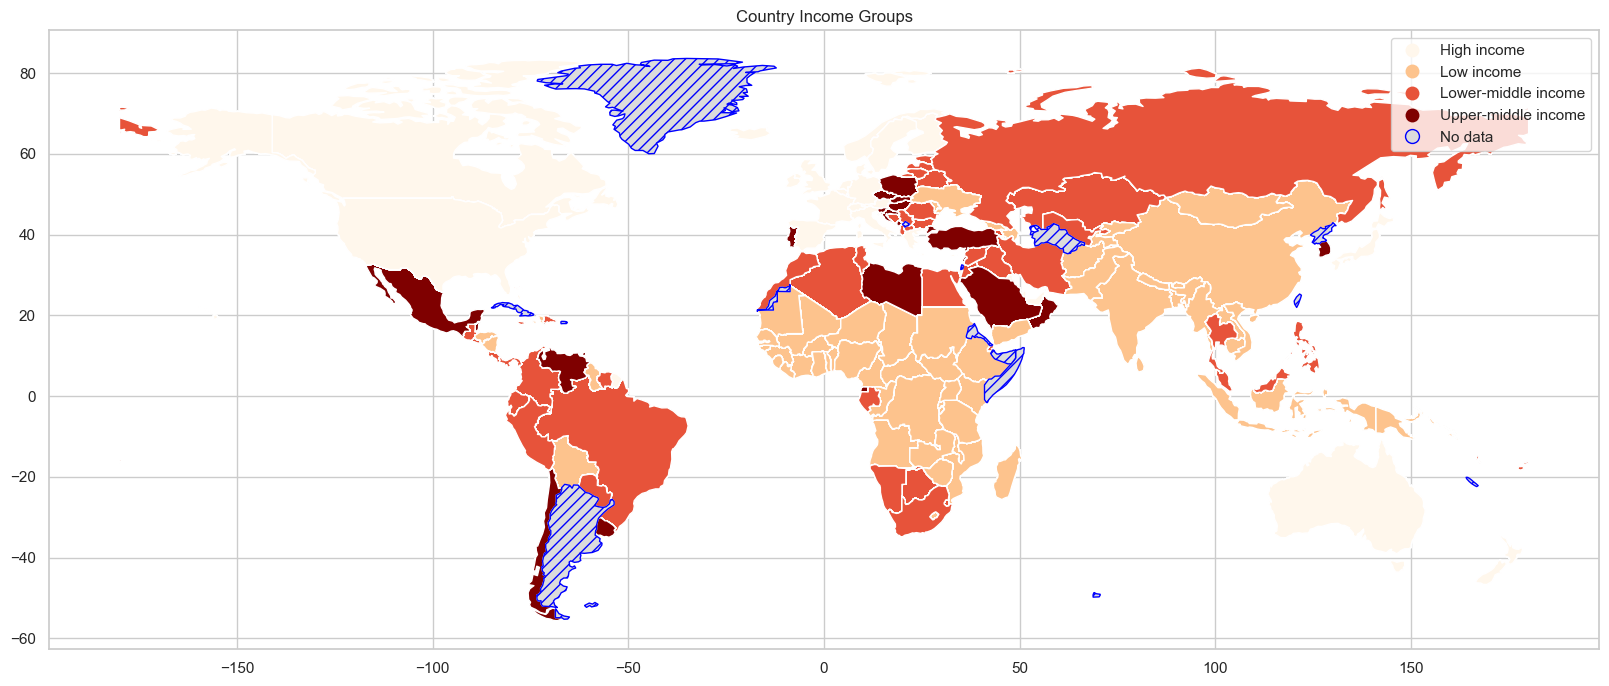

In [34]:
sns.set_theme(style = "whitegrid")

join_world_map.plot(column = "By Income",
                    cmap = "OrRd",
                    legend = True,
                    figsize = (20, 10),
                    # handle missing values (i.e., NaN or None)
                    missing_kwds = {   
                        "color": "gainsboro",
                        "edgecolor": "blue",
                        "hatch": "///",
                        "label": "No data",
                    })

plt.title("Country Income Groups")
plt.show();

**Observation**

1. *Low income countries*: The majority of Southern and Eastern Asia, Western, Central, and Eastern Africa, several Carribean, Central America, and some South America countries
2. *Lower-middle income countries*: Northern and Central Asia, most of Southern and Northern Africa, several Eastern European countries
3. *Upper-middle income countries*: Some of the Middle East and Northern Africa countries, some Eastern European countries, a few South American countries, Mexico, South Korea, 
4. *High income countries*: Canada & USA, Western Europe, Japan, Australia & New Zealand

Now, let's do a comprehensive overview and comparison between countries by GDP Growth, Inflation Rate, and Unemployment Rate

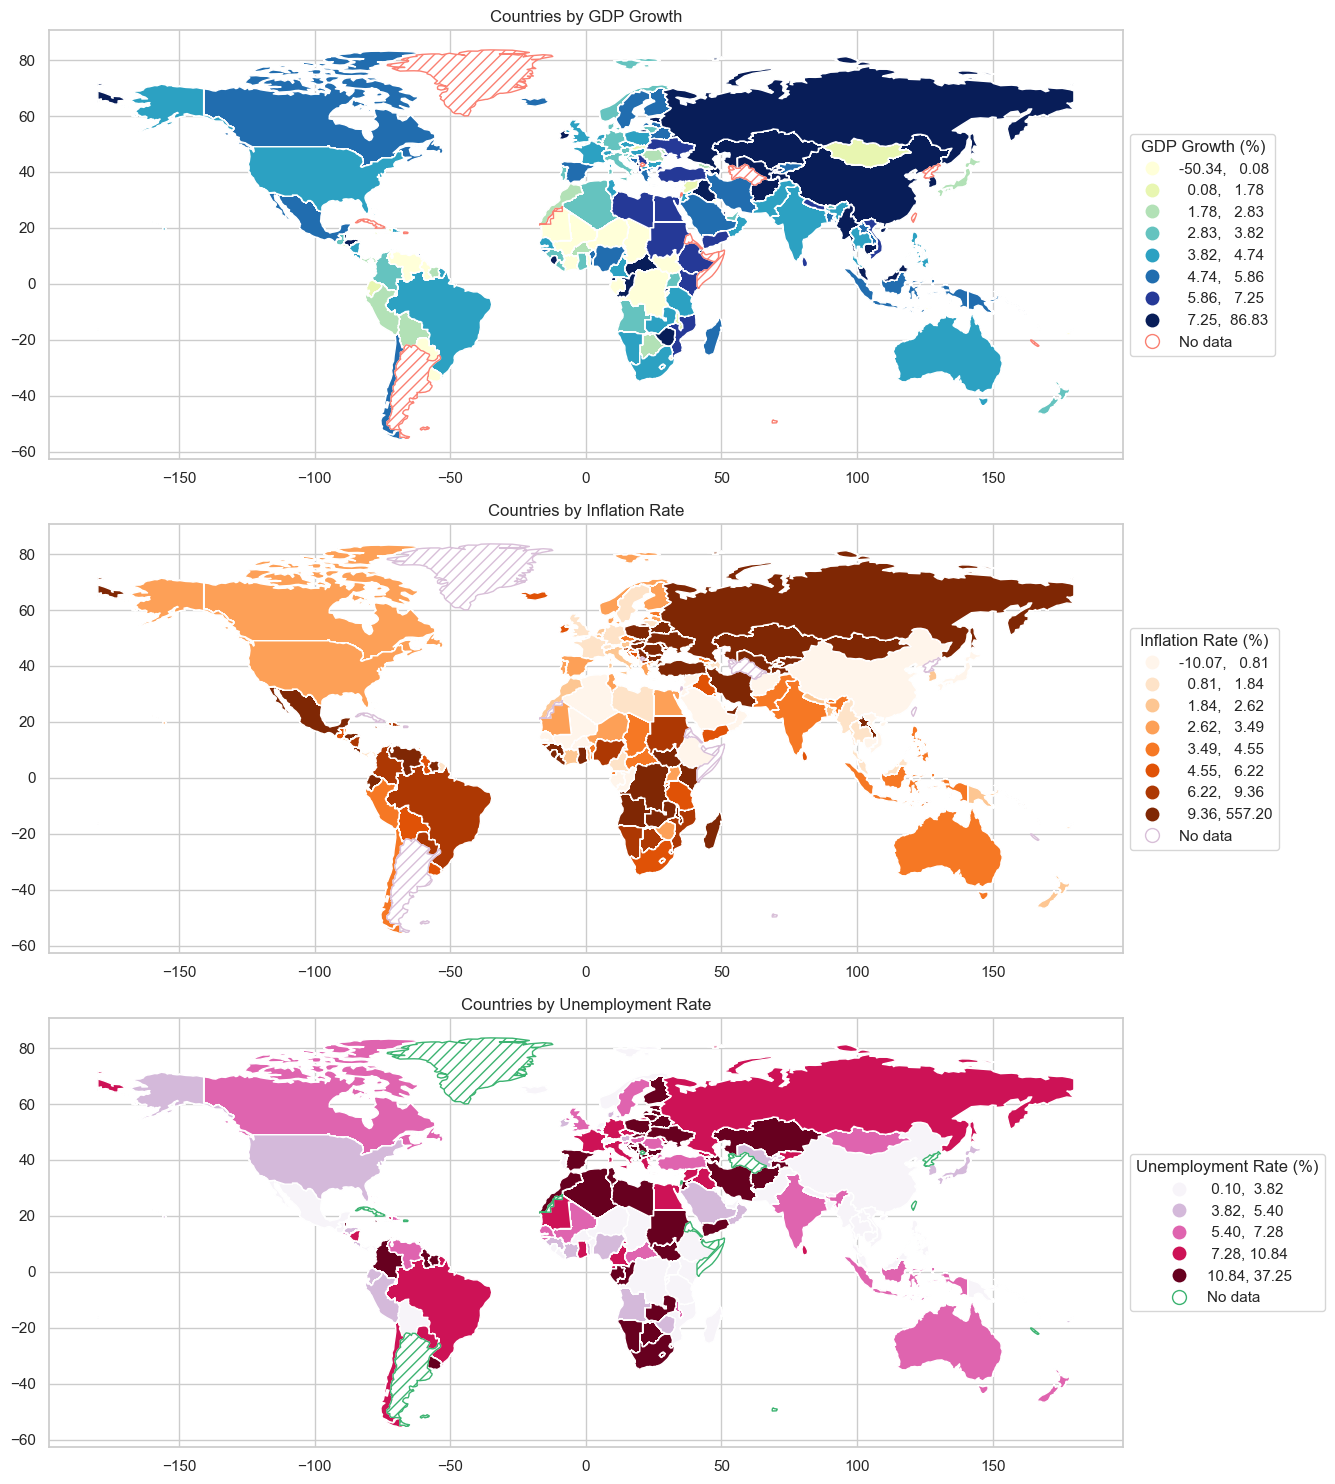

In [35]:
fig, axs = plt.subplots(3, 1, figsize = (30, 15))

rate = ["GDP Growth", "Inflation Rate", "Unemployment Rate"]
color_pallete = ["YlGnBu", "Oranges", "PuRd"]
missing_data_color = ["salmon", "thistle", "mediumseagreen"]
quantile_value = [8, 8, 5]


for row in range(3):
        
        economic_rate = rate[row] 
        color = color_pallete[row]
        missing_color = missing_data_color[row]
        quantile = quantile_value[row]
        
        axs[row] = join_world_map.plot(column = economic_rate,
                                       legend = True,
                                       legend_kwds = {"loc": "center left",
                                                      "bbox_to_anchor": (1, 0.5),       # x = 1 locate the legend to the right
                                                                                        # y = 0.5 locate the legend halfway up
                                                                                        # (0, 0) is the lower left corner
                                                      "title": economic_rate + " (%)"},      
                                                                                        
                                                                                        
                                       # break down the data into k quantiles
                                       scheme = "Quantiles",
                                       k = quantile, 
                                       cmap = color,
                                       # handle missing values (i.e., NaN or None)
                                       missing_kwds = {   
                                            "color": "white",
                                            "edgecolor": missing_color,
                                            "hatch": "///",
                                            "label": "No data"
                                       },
                                       ax = axs[row])
        
        axs[row].set_title("Countries by " + economic_rate)
        
                
plt.tight_layout()
plt.show();

**GDP Growth** 
- Low GDP Growth (light yellow to light green): Western and Central Africa, a number of South Americans countries
- Normal GDP Growth (green to blue): North American, Oceania, Western Europe, the majority of Southern and Eastern Africa, and Southern and Western Asia
- High GDP Growth (darker shade of blue): Eastern Europe, a handful of countries in Northern and Western Africa, Eastern region**s** of Asia


*Surprising findings*: Overall, I did not found any surprising findings.

*Remark*: The GDP Growth distribution, to a great extent, reflects the current world's trend, including but not limited to

    a. Asia and Northern Africa are emerging markets, leading to high GDP Growth
    b. Europe's and North America's markets are saturated, which results in relatively low but stable GDP Growth
    c. Many Southern Eastern African countries faced/are facing war, political unstability, and high poverty rate, resulting in low GDP growth

**Inflation Rate**

- Low inflation rate (light orange): East and several South-East Asian and Middle East countries, ~ three quarters of Western Europe, a few North African countries
- Normal inflation rate (orange): USA & Canada, Oceania, South Asia, most of Northern Africa, ~ one quarters of Western Europe
- High inflation rate (dark orange): Mexico and Central America, majority of South America, North and Central Asia, Eastern Europe, most African countries (besides the North African region)

*Surprising findings*: Firstly, I didn't expected the number of regions with high inflation rate would be that much. Secondly, for specific countries such as China and UK, I expected its inflation rate would be higher due to the large economic activities.

*Remark*: Most of the inflation rate pattern can be explained by

    a. Low inflation countries have tight monetary policies (e.g., China, Vietnam), low commodity prices (e.g., Western Europe), or low fuel and enegry costs (e.g., the Middle East)
    b. Most countries with normal inflation rate have a stable economy and a moderate monetary policies
    c. High inflation countries often experience high commodity prices and cost of living, perhaps due to war, social unstability, high poverty rate (e.g., Central and South America, Central Africa) or high food and energy cost (e.g., Wester Europe)

**Unemployment Rate**

- Low unemployment rate (light purple): East and South East Asia, a few Western, Central, and Eastern African countries, Mexico, Bolivia)
- Normal unemployment rate (purple and pink): US & Canada, Western Europe, Central Asia, most of Western and Central African countries, some Central and South American countries.
- High unemployment rate (darker pink shade): Northern and Southern Africa, most of South America, Russia and Eastern Europe

*Surprising findings*: There're certain countries that I'm surprise to find low unemploymen rate given their unstable socio-economic conditions (e.g., Bolivia, Chad, DRC). Furthermore, I didn't expected Eastern Europe to have high unemployment rate given the aid and more open economic policy they implemented

*Remark*: Among the three economic indicators, unemployment rate have the least variation and there's a more concrete grouping, geography-wise. 

**Insight**

Using our information, we can see the general pattern 

    - Lower income countries tends to have either a low GDP Growth (due to poor economic growth) or a high GDP Growth (rapid economic growth), high Inflation Rate, and high Unemployment Rate (normally a combination of 2 out of the 3 indicators)
    - Conversely, higher income countries tend to have a moderate/normal % of all three economic indicators (unemployment rate can be slightly high), and they are often stable 
    
However, this is a generalization as it is different from country-to-country basis and time-to-time (e.g., during the Great Recession, even high income countries experienced low/negative GDP Growth and high unemployment rate).